# Ejercicio A3 - Sistemas de Aprendizaje Automático - C.E. FP IA y BigData -

In [88]:
# Importación de las bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

## Cargar csv

In [89]:
from google.colab import drive
drive.mount('/content/drive')

ruta = '/content/drive/MyDrive/IAUOC/SAA/2/urban_cultivation.csv'
df = pd.read_csv(ruta)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [90]:
df

,PlotID,SensorBatchCode,SoilPH,AvgDailySunlight,WateringFrequency,GrowthDays,FertilizerQuantity,PlantType,PesticideUsed,ContainerSize,UrbanZone,SuccessfulHarvest
0,1,89211,6.85,5.7,5.0,70.0,133.0,Root,No,Large,C,No
1,2,14416,6.40,5.9,4.0,75.0,132.0,Root,No,medium,C,No
2,3,89479,NaN,6.1,3.0,71.0,80.0,Leafy,Yes,Medium,C,Yes
3,4,79374,7.57,7.9,5.0,82.0,137.0,Root,Yes,Medium,C,Yes
4,5,26398,6.34,4.5,2.0,98.0,179.0,Leafy,Yes,Medium,A,No
...,...,...,...,...,...,...,...,...,...,...,...,...
5145,3239,83874,6.63,5.3,5.0,91.0,NaN,Fruit,Yes,Medium,C,No
5146,2975,80878,7.14,5.7,6.0,97.0,153.0,Root,No,Large,B,No
5147,3581,91446,7.99,7.1,7.0,81.0,NaN,Leafy,No,Small,B,Yes
5148,2888,89428,7.47,7.3,3.0,80.0,84.0,Leafy,Yes,Medium,C,Yes


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5150 entries, 0 to 5149
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PlotID              5150 non-null   int64  
 1   SensorBatchCode     5150 non-null   int64  
 2   SoilPH              4650 non-null   float64
 3   AvgDailySunlight    5150 non-null   float64
 4   WateringFrequency   5150 non-null   float64
 5   GrowthDays          5150 non-null   float64
 6   FertilizerQuantity  4650 non-null   float64
 7   PlantType           5150 non-null   object 
 8   PesticideUsed       5150 non-null   object 
 9   ContainerSize       5150 non-null   object 
 10  UrbanZone           5150 non-null   object 
 11  SuccessfulHarvest   5150 non-null   object 
dtypes: float64(5), int64(2), object(5)
memory usage: 482.9+ KB


## Selección de características

In [92]:
# Borrar únicos
df = df.drop(['PlotID', 'SensorBatchCode'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5150 entries, 0 to 5149
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SoilPH              4650 non-null   float64
 1   AvgDailySunlight    5150 non-null   float64
 2   WateringFrequency   5150 non-null   float64
 3   GrowthDays          5150 non-null   float64
 4   FertilizerQuantity  4650 non-null   float64
 5   PlantType           5150 non-null   object 
 6   PesticideUsed       5150 non-null   object 
 7   ContainerSize       5150 non-null   object 
 8   UrbanZone           5150 non-null   object 
 9   SuccessfulHarvest   5150 non-null   object 
dtypes: float64(5), object(5)
memory usage: 402.5+ KB


## Nulos

In [93]:
# Mostramos cuántos valores nulos hay en cada columna
print(df.isnull().sum())

SoilPH                500
AvgDailySunlight        0
WateringFrequency       0
GrowthDays              0
FertilizerQuantity    500
PlantType               0
PesticideUsed           0
ContainerSize           0
UrbanZone               0
SuccessfulHarvest       0
dtype: int64


In [94]:
# Como hay algunos valores nulos los actualizamos con su media
# Otra opción sería elimnarlos
df.loc[:, 'SoilPH'] = df['SoilPH'].fillna(df['SoilPH'].median())
df.loc[:, 'FertilizerQuantity'] = df['FertilizerQuantity'].fillna(df['FertilizerQuantity'].median())

In [95]:
print(df.isnull().sum())

SoilPH                0
AvgDailySunlight      0
WateringFrequency     0
GrowthDays            0
FertilizerQuantity    0
PlantType             0
PesticideUsed         0
ContainerSize         0
UrbanZone             0
SuccessfulHarvest     0
dtype: int64


## Únicos

In [96]:
# Comprobación de los valores únicos en columnas de tipo object
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].unique()}")

PlantType: ['Root' 'Leafy' 'Fruit' 'leafy']
PesticideUsed: ['No' 'Yes' 'YES']
ContainerSize: ['Large' 'medium' 'Medium' 'Small']
UrbanZone: ['C' 'A' 'B']
SuccessfulHarvest: ['No' 'Yes']


In [97]:
# Unificar categorias de PlantType
df['PlantType'] = df['PlantType'].replace({
    'leafy': 'Leafy',
    'Fruits': 'Fruit',
    'Rt': 'Root'
})

# Unificar categorias de PesticideUsed
df['PesticideUsed'] = df['PesticideUsed'].str.capitalize()

# Unificar categorias de ContainerSize
df['ContainerSize'] = df['ContainerSize'].replace({
    'medium': 'Medium',
    'L': 'Large'
})

In [98]:
# Comprobación de los valores únicos en columnas de tipo object
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].unique()}")

PlantType: ['Root' 'Leafy' 'Fruit']
PesticideUsed: ['No' 'Yes']
ContainerSize: ['Large' 'Medium' 'Small']
UrbanZone: ['C' 'A' 'B']
SuccessfulHarvest: ['No' 'Yes']


## Duplicados

In [99]:
# Comprobamos cuántas filas están duplicadas
print("Filas duplicadas:", df.duplicated().sum())

Filas duplicadas: 127


In [100]:
# Eliminamos las filas duplicadas manteniendo solo la primera aparición
df = df.drop_duplicates()

In [101]:
# Comprobamos cuántas filas están duplicadas
print("Filas duplicadas:", df.duplicated().sum())

Filas duplicadas: 0


## Distribuciones

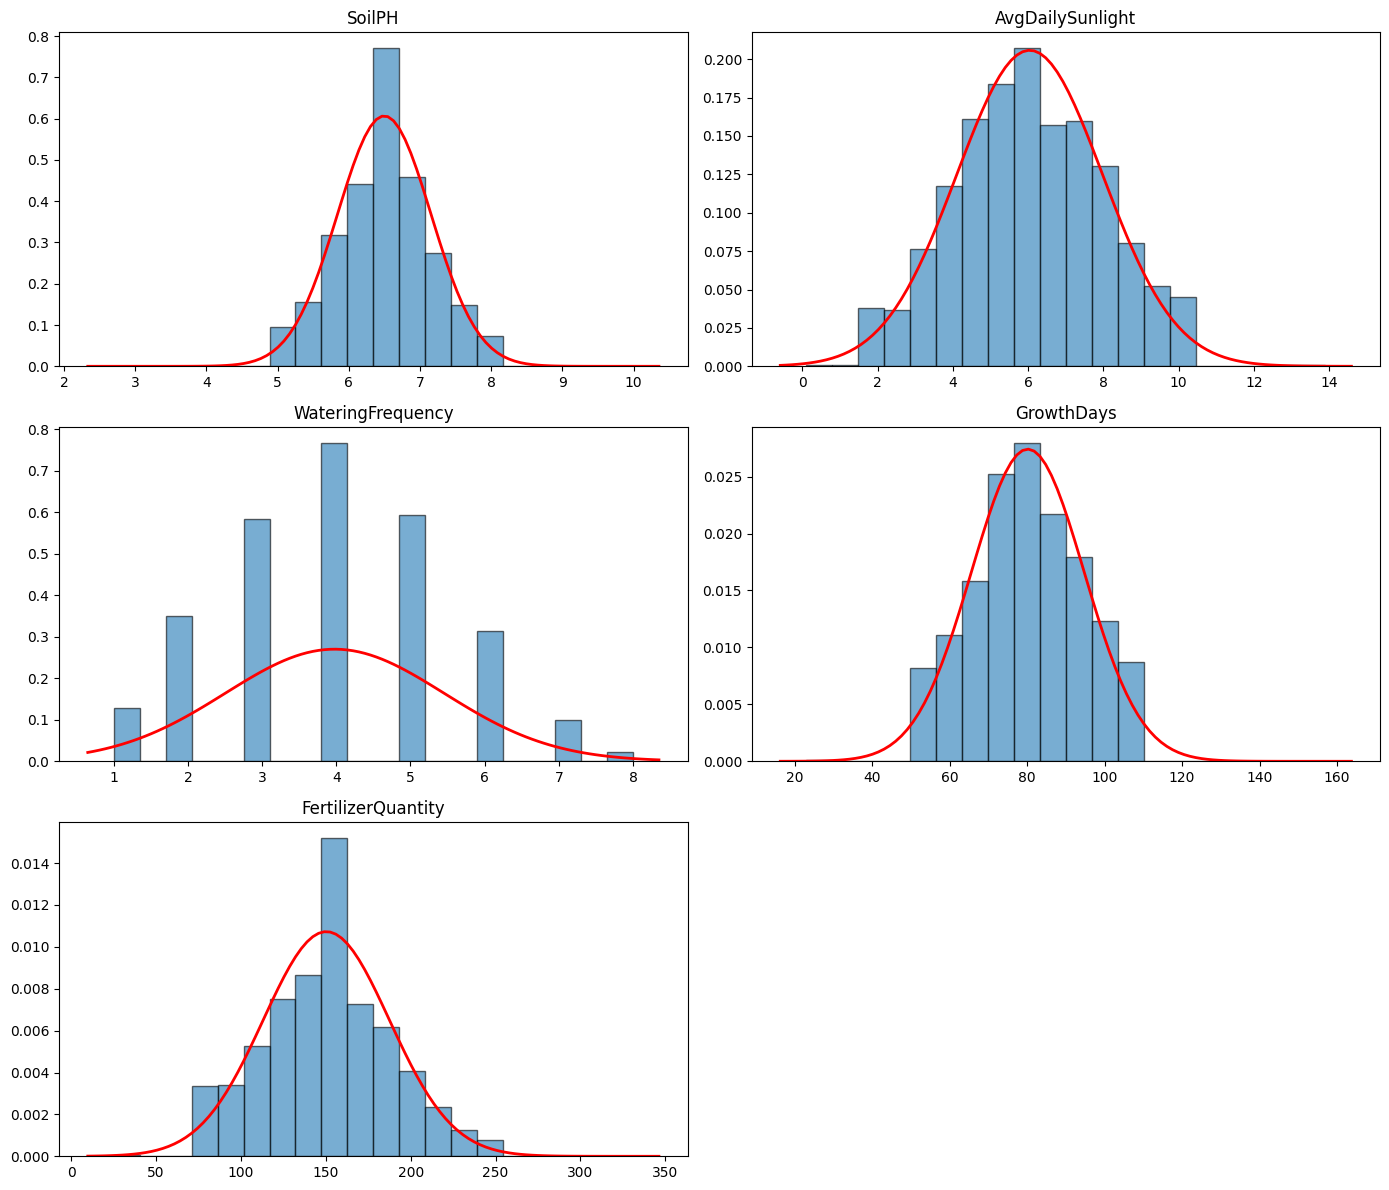

In [102]:
"""La mayoría de las variables numéricas presentan distribuciones aproximadamente normales o simétricas"""

import matplotlib.pyplot as plt
import scipy.stats as stats

columnas_numericas = df.select_dtypes(include=["float64", "int64"]).columns

fig, axes = plt.subplots(3, 2, figsize=(14, 12))
axes = axes.flatten()

for i, col in enumerate(columnas_numericas):
    ax = axes[i]
    data = df[col].dropna()

    ax.hist(data, bins=20, density=True, alpha=0.6, edgecolor='black')
    xmin, xmax = ax.get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, data.mean(), data.std())
    ax.plot(x, p, 'r', linewidth=2)
    ax.set_title(col)

# Ocultamos la última gráfica vacía si hay menos de 6 columnas
for j in range(len(columnas_numericas), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Correlaciones con la variable objectivo

In [103]:
"""
Convertimos la variable objetivo 'SuccessfulHarvest' de texto a valores numéricos binarios:
- 'Yes' se transforma en 1 (cultivo exitoso)
- 'No' se transforma en 0 (cultivo fallido)

Esto es necesario para que los modelos de clasificación y las funciones estadísticas (como la correlación)
puedan trabajar correctamente con esta variable.
"""
df['SuccessfulHarvest'] = df['SuccessfulHarvest'].map({'Yes': 1, 'No': 0})

In [104]:
"""
Los valores de correlación muestran que ninguna variable numérica se relaciona de forma fuerte y lineal con la variable objetivo.
Destaca AvgDailySunlight con una correlación positiva moderada (0.60), lo que indica que una mayor exposición solar está asociada con una mayor probabilidad de éxito.
FertilizerQuantity también muestra cierta relación positiva (0.17), aunque más débil.
Las demás variables no presentan correlaciones significativas.
Esto sugiere que el rendimiento del cultivo depende de múltiples factores combinados, y no de una sola variable por separado.
Modelos capaces de capturar interacciones o relaciones no lineales podrían resultar más eficaces para predecir el éxito del cultivo.
"""
# Mostramos la correlación entre cada variable numérica y la variable objetivo
correlaciones = df.select_dtypes(include=["float64", "int64"]).corr()["SuccessfulHarvest"].drop("SuccessfulHarvest")
print(correlaciones)


SoilPH               -0.008646
AvgDailySunlight      0.606070
WateringFrequency    -0.011492
GrowthDays            0.001286
FertilizerQuantity    0.170542
Name: SuccessfulHarvest, dtype: float64


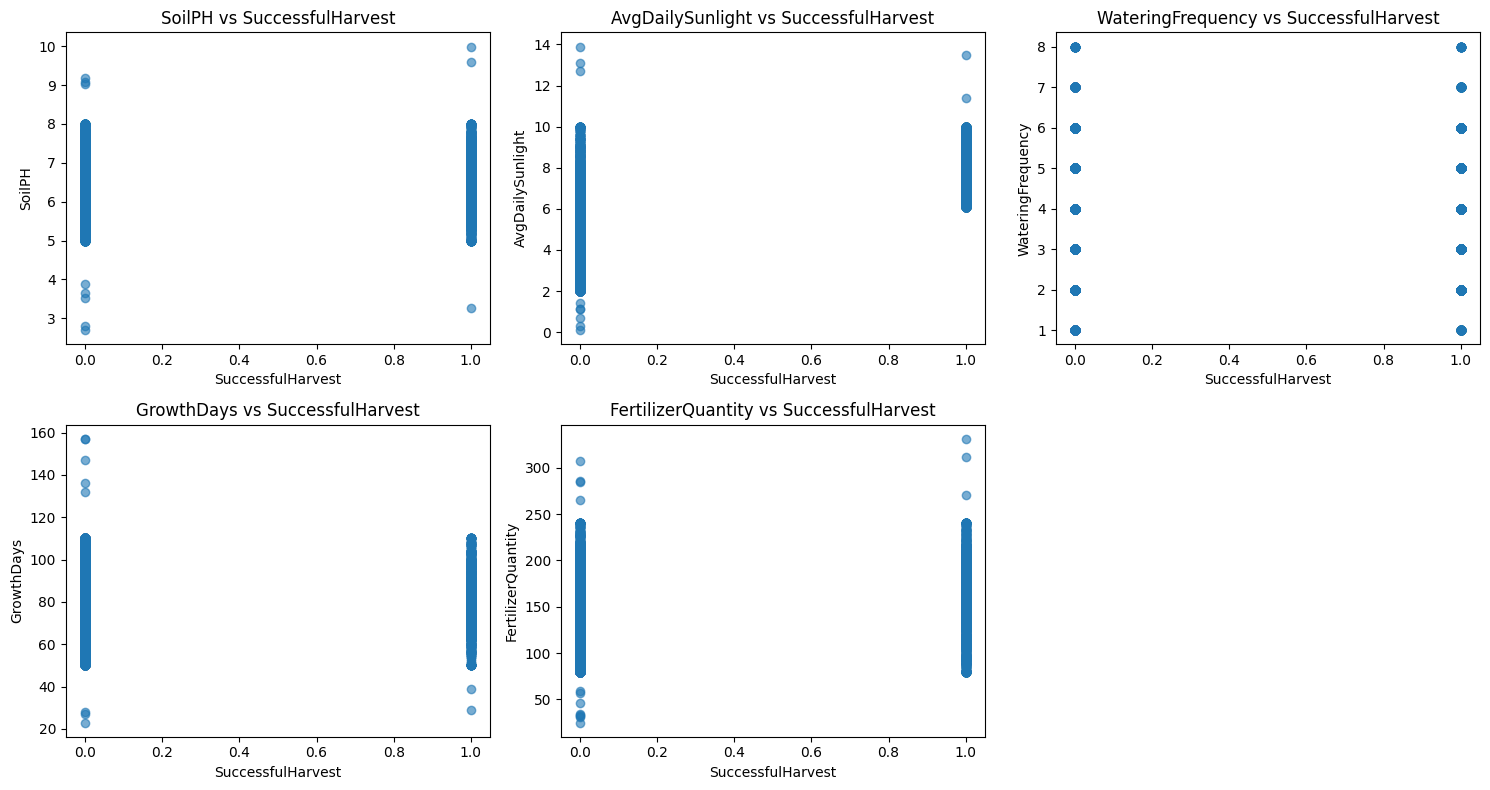

In [105]:
import matplotlib.pyplot as plt

features = df.select_dtypes(include=["float64", "int64"]).columns.drop("SuccessfulHarvest")

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for i, col in enumerate(features):
    axes[i].scatter(df["SuccessfulHarvest"], df[col], alpha=0.6)
    axes[i].set_title(f"{col} vs SuccessfulHarvest")
    axes[i].set_xlabel("SuccessfulHarvest")
    axes[i].set_ylabel(col)

for j in range(len(features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Equilibrio

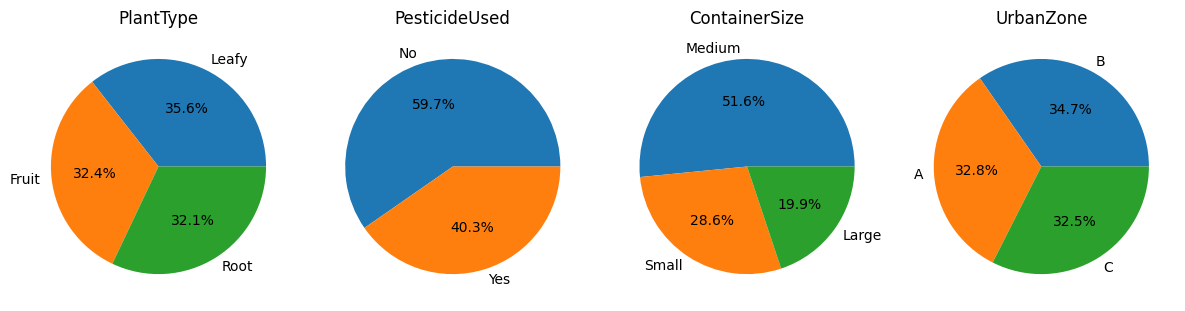

In [106]:
import matplotlib.pyplot as plt

cat_cols = df.select_dtypes(include='object').columns

fig, axes = plt.subplots(1, len(cat_cols), figsize=(12, 5))

for i, col in enumerate(cat_cols):
    df[col].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_ylabel("")

plt.tight_layout()
plt.show()

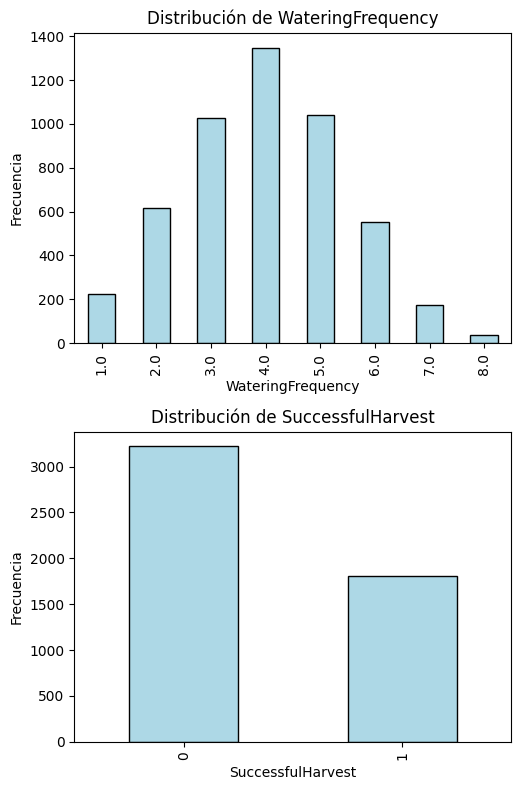

In [107]:
import matplotlib.pyplot as plt

num_cols = df.select_dtypes(exclude="object").columns

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    valores_unicos = df[col].nunique()
    if valores_unicos <= 20:
        df[col].value_counts().sort_index().plot(kind="bar", ax=axes[i], color="lightblue", edgecolor="black")
        axes[i].set_title(f"Distribución de {col}")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("Frecuencia")
    else:
        axes[i].set_visible(False)

plt.tight_layout()
plt.show()


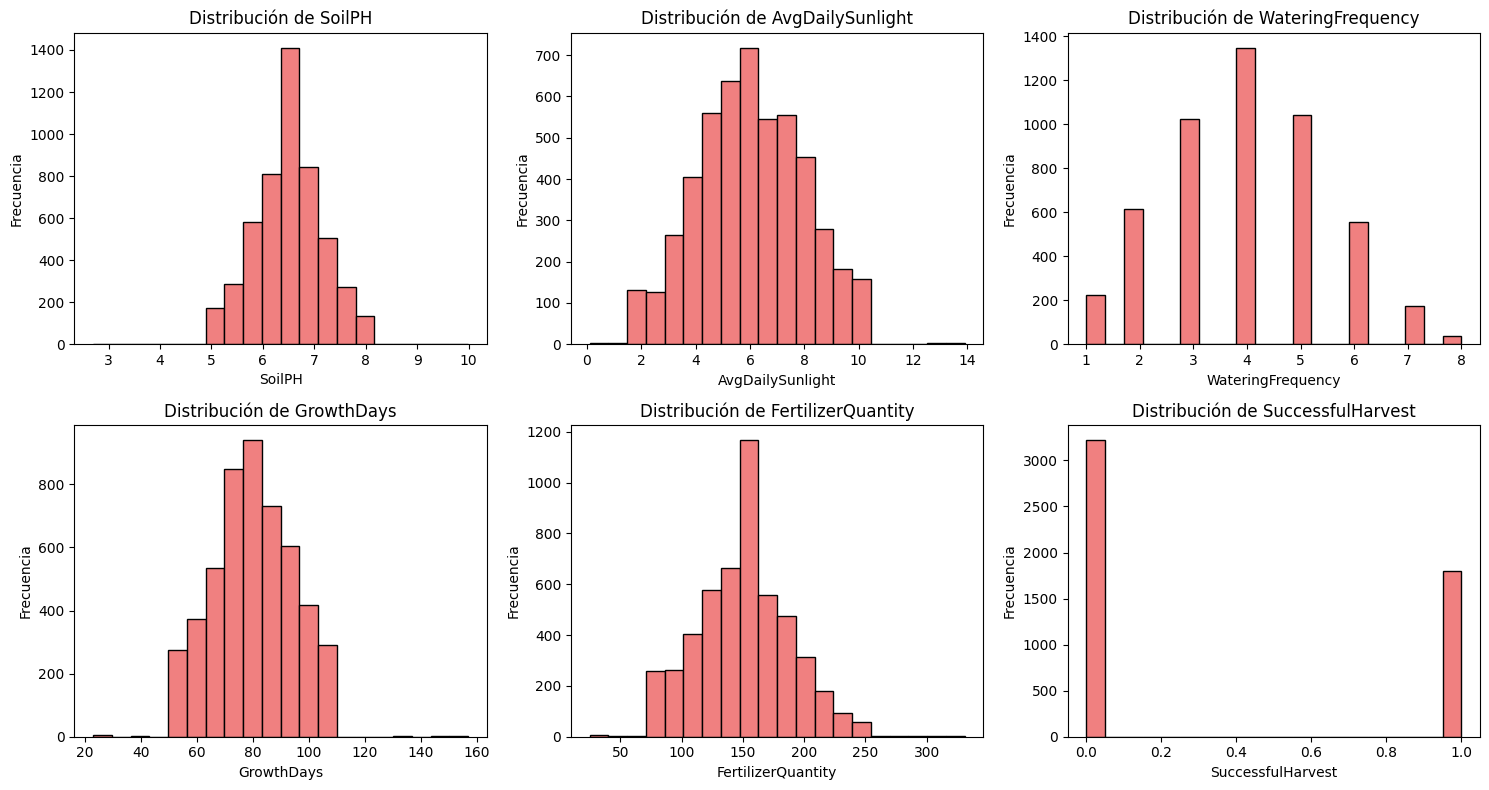

In [108]:
import matplotlib.pyplot as plt

num_cols = df.select_dtypes(exclude="object").columns

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    axes[i].hist(df[col], bins=20, edgecolor='black', color='lightcoral')
    axes[i].set_title(f"Distribución de {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frecuencia")

plt.tight_layout()
plt.show()


## Outliers

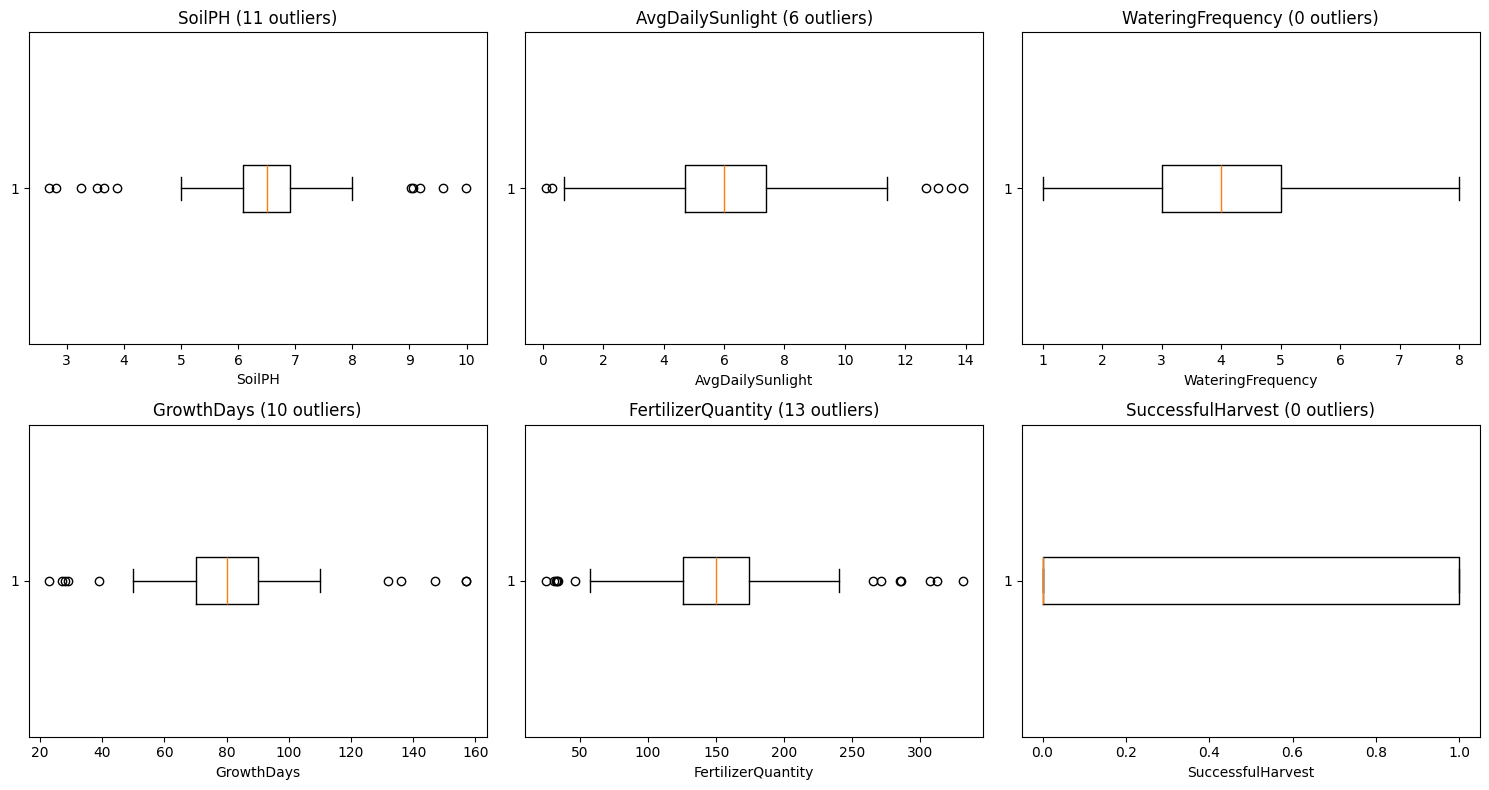

In [109]:
import matplotlib.pyplot as plt

num_cols = df.select_dtypes(exclude="object").columns

# Calculamos outliers por IQR
outliers = {}

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR
    n_outliers = df[(df[col] < lim_inf) | (df[col] > lim_sup)].shape[0]
    outliers[col] = n_outliers

    axes[i].boxplot(df[col], vert=False)
    axes[i].set_title(f"{col} ({n_outliers} outliers)")
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()


In [110]:
for col, cantidad in outliers.items():
    print(f"{col}: {cantidad} valores atípicos")

SoilPH: 11 valores atípicos
AvgDailySunlight: 6 valores atípicos
WateringFrequency: 0 valores atípicos
GrowthDays: 10 valores atípicos
FertilizerQuantity: 13 valores atípicos
SuccessfulHarvest: 0 valores atípicos


In [111]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR
    df = df[(df[col] >= lim_inf) & (df[col] <= lim_sup)]

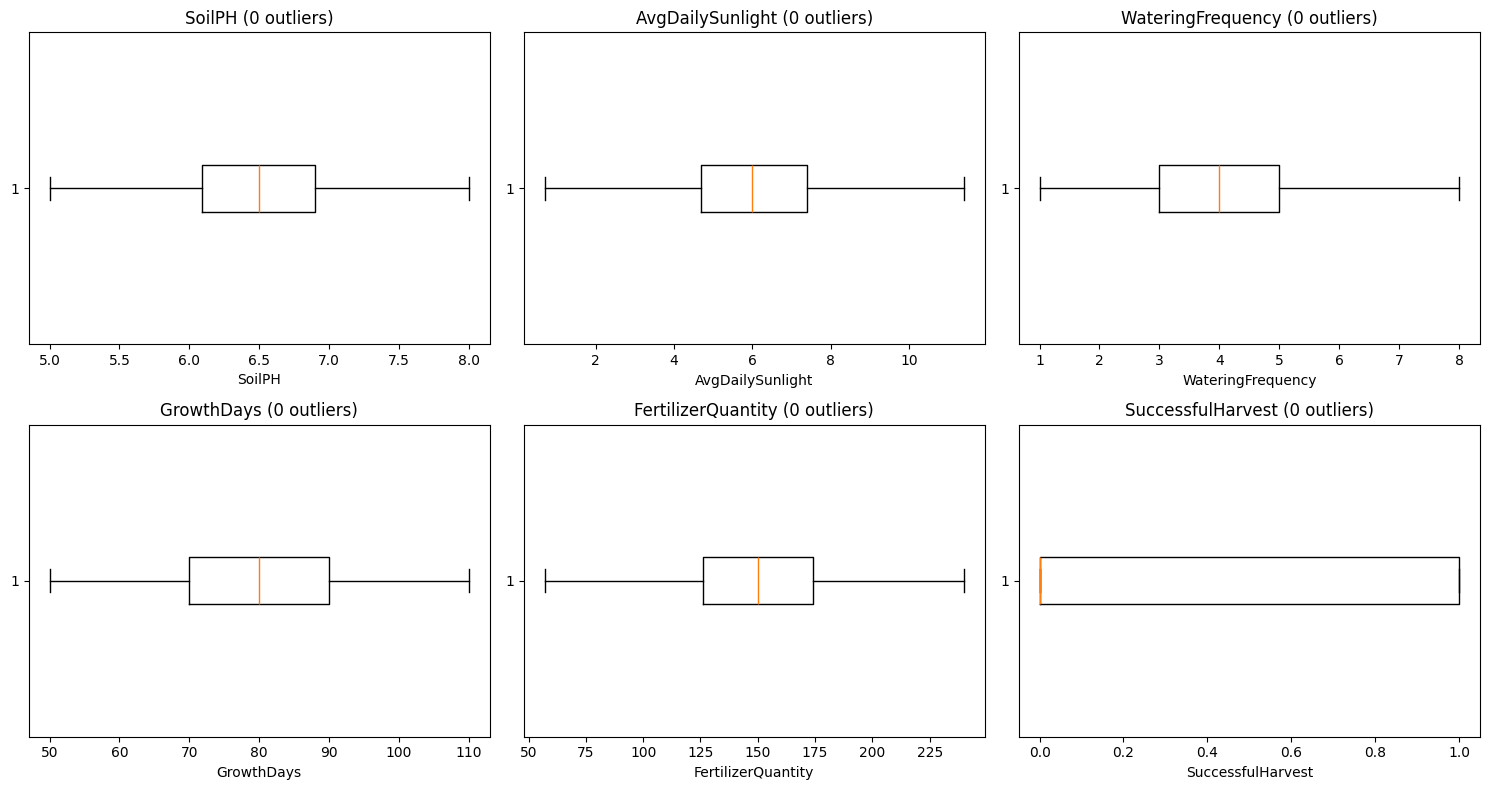

In [112]:
import matplotlib.pyplot as plt

num_cols = df.select_dtypes(exclude="object").columns

# Calculamos outliers por IQR
outliers = {}

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR
    n_outliers = df[(df[col] < lim_inf) | (df[col] > lim_sup)].shape[0]
    outliers[col] = n_outliers

    axes[i].boxplot(df[col], vert=False)
    axes[i].set_title(f"{col} ({n_outliers} outliers)")
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()

In [113]:
for col, cantidad in outliers.items():
    print(f"{col}: {cantidad} valores atípicos")

SoilPH: 0 valores atípicos
AvgDailySunlight: 0 valores atípicos
WateringFrequency: 0 valores atípicos
GrowthDays: 0 valores atípicos
FertilizerQuantity: 0 valores atípicos
SuccessfulHarvest: 0 valores atípicos


## División datos

In [114]:
from sklearn.model_selection import train_test_split

X = df.drop("SuccessfulHarvest", axis=1)
y = df["SuccessfulHarvest"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Separación columnas por tipo de datos

In [115]:
# Separación de columnas numéricas y categóricas
cat_cols = X_train.select_dtypes(include="object").columns
num_cols = X_train.select_dtypes(exclude="object").columns

## Encoders

In [116]:
# Aplicamos LabelEncoder a las categóricas
from sklearn.preprocessing import LabelEncoder

encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col]  = le.transform(X_test[col])
    encoders[col] = le

In [117]:
X_train.head()

,SoilPH,AvgDailySunlight,WateringFrequency,GrowthDays,FertilizerQuantity,PlantType,PesticideUsed,ContainerSize,UrbanZone
809,5.87,6.1,7.0,88.0,141.0,1,0,2,0
1300,6.03,5.7,4.0,83.0,141.0,1,1,1,2
2184,5.00,9.6,4.0,88.0,150.0,2,1,0,0
2446,6.71,5.2,3.0,68.0,181.0,1,1,1,2
2617,6.56,7.9,2.0,88.0,210.0,1,1,1,2


In [118]:
X_test.head()

,SoilPH,AvgDailySunlight,WateringFrequency,GrowthDays,FertilizerQuantity,PlantType,PesticideUsed,ContainerSize,UrbanZone
2339,6.04,8.7,2.0,87.0,198.0,0,1,2,1
155,6.00,6.0,6.0,96.0,150.0,1,0,0,2
4243,6.99,7.2,4.0,77.0,106.0,2,0,1,1
1446,6.13,7.1,6.0,74.0,150.0,1,0,1,0
4962,6.41,2.0,2.0,84.0,178.0,2,0,1,2


## Correlaciones

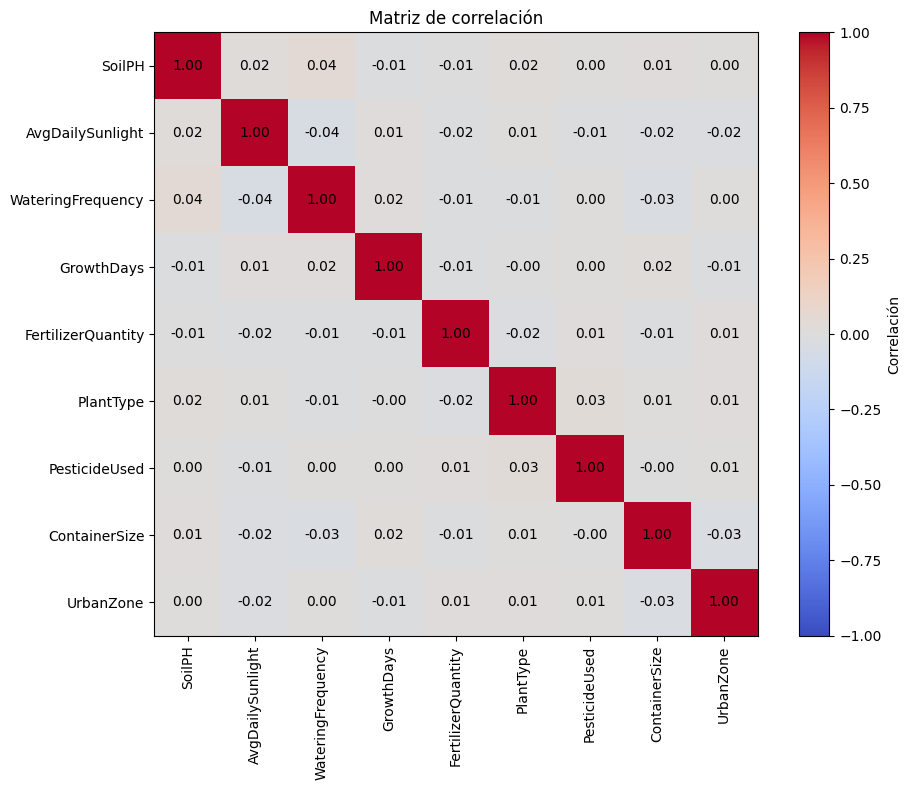

In [119]:
import matplotlib.pyplot as plt

correlation_matrix = X_train.corr()

plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap="coolwarm", interpolation="none", vmin=-1, vmax=1)
plt.colorbar(label="Correlación")

cols = X_train.columns
plt.xticks(range(len(cols)), cols, rotation=90)
plt.yticks(range(len(cols)), cols)

for i in range(len(cols)):
    for j in range(len(cols)):
        value = correlation_matrix.iloc[i, j]
        plt.text(j, i, f"{value:.2f}", ha='center', va='center', color='black', fontsize=10)

plt.title("Matriz de correlación")
plt.tight_layout()
plt.show()

## Normalización y escalado

In [120]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols]  = scaler.transform(X_test[num_cols])

In [121]:
X_train.head()

,SoilPH,AvgDailySunlight,WateringFrequency,GrowthDays,FertilizerQuantity,PlantType,PesticideUsed,ContainerSize,UrbanZone
809,-0.985407,0.024260,2.042359,0.557194,-0.246174,1,0,2,0
1300,-0.735180,-0.183518,0.022583,0.205850,-0.246174,1,1,1,2
2184,-2.346015,1.842315,0.022583,0.557194,0.000290,2,1,0,0
2446,0.328284,-0.443240,-0.650675,-0.848181,0.849224,1,1,1,2
2617,0.093696,0.959259,-1.323933,0.557194,1.643388,1,1,1,2


In [122]:
X_test.head()

,SoilPH,AvgDailySunlight,WateringFrequency,GrowthDays,FertilizerQuantity,PlantType,PesticideUsed,ContainerSize,UrbanZone
2339,-0.719541,1.374815,-1.323933,0.486925,1.314769,0,1,2,1
155,-0.782098,-0.027685,1.369100,1.119344,0.000290,1,0,0,2
4243,0.766181,0.595648,0.022583,-0.215762,-1.204648,2,0,1,1
1446,-0.578789,0.543704,1.369100,-0.426568,0.000290,1,0,1,0
4962,-0.140892,-2.105462,-1.323933,0.276119,0.767069,2,0,1,2


# Extracción de datos para contraste (comprobar generalización)

In [123]:
# Extraer un 7% de los datos para newDataContrast
newDataContrast = df.sample(frac=0.07, random_state=42)

# Eliminar las filas extraídas de df
df = df.drop(newDataContrast.index)

# Verificar el tamaño de los dataframes
print(f"Tamaño de df después de la extracción: {df.shape}")
print(f"Tamaño de newDataContrast: {newDataContrast.shape}")

Tamaño de df después de la extracción: (4634, 10)
Tamaño de newDataContrast: (349, 10)


# Fase 4: Entrenamiento del modelo y realización de las predicciones y Fase 5: Validación del modelo (NB)

In [124]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

Exactitud: 0.8642
Precisión: 0.8630


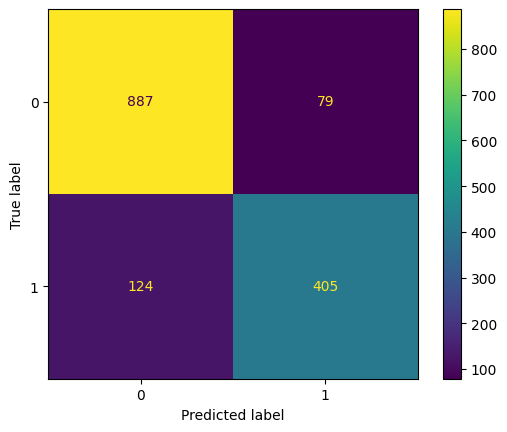

In [125]:
# Inicialización del clasificador
from sklearn.naive_bayes import GaussianNB
clasificador_NB = GaussianNB()

# Entrenamiento del clasificador
clasificador_NB.fit(X_train, y_train)

# Realización de las predicciones
predicciones_NB = clasificador_NB.predict(X_test)

# Creación de la matriz de confusión
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, predicciones_NB);

# Cálculo de varias métricas de rendimiento
accuracy_NB = accuracy_score(y_test, predicciones_NB)
precision_NB = precision_score(y_test, predicciones_NB, average='weighted')
print(f"Exactitud: {accuracy_NB:.4f}")
print(f"Precisión: {precision_NB:.4f}")

## Fase 6: Optimitzación del modelo y Fase 7: Validación del nuevo

Mejores hiperparámetros: {'var_smoothing': 1e-09}
Exactitud: 0.8642
Precisión: 0.8630


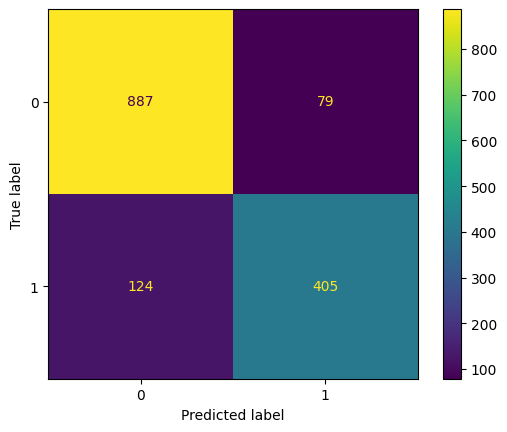

In [126]:
# Inicialización del clasificador
clasificador_NB2 = GaussianNB()

# Definición del grid de hiperparámetros
# var_smoothing evita divisiones por cero o varianzas demasiado pequeñas en las probabilidades
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]}

# Inicialización de GridSearchCV con validación cruzada
grid_search = GridSearchCV(clasificador_NB2, param_grid, cv=5, n_jobs=-1)

# Entrenamiento con búsqueda de los mejores hiperparámetros
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros encontrados
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

# Crear el clasificador con los mejores valores encontrados
clasificador_NB2 = GaussianNB(**best_params)

# Entrenamiento del modelo optimizado
clasificador_NB2.fit(X_train, y_train)

# Predicciones sobre el conjunto de test
predicciones_NB2 = clasificador_NB2.predict(X_test)

# Matriz de confusión
ConfusionMatrixDisplay.from_predictions(y_test, predicciones_NB2)

# Cálculo de métricas
accuracy_NB2 = accuracy_score(y_test, predicciones_NB2)
precision_NB2 = precision_score(y_test, predicciones_NB2, average='weighted')

# Mostrar resultados
print(f"Exactitud: {accuracy_NB2:.4f}")
print(f"Precisión: {precision_NB2:.4f}")

# Fase 4: Entrenamiento del modelo y realización de las predicciones y Fase 5: Validación del modelo (k-NN)

Exactitud: 0.8716
Precisión: 0.8717


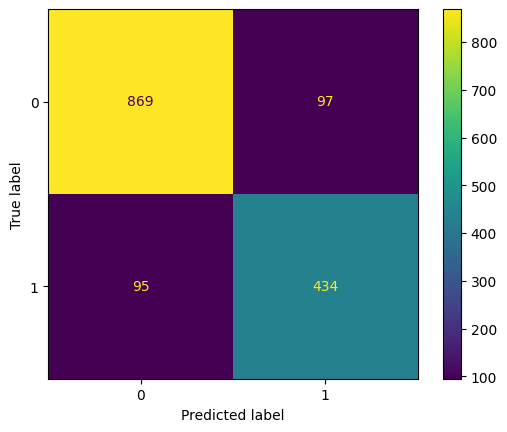

In [127]:
# Inicialización del clasificador
clasificador_KNN = KNeighborsClassifier(n_neighbors=5)

# Entrenamiento del clasificador
clasificador_KNN.fit(X_train, y_train)

# Realización de las predicciones
predicciones_KNN = clasificador_KNN.predict(X_test)

# Creación de la matriz de confusión
ConfusionMatrixDisplay.from_predictions(y_test, predicciones_KNN);

# Cálculo de varias métricas de rendimiento
accuracy_KNN = accuracy_score(y_test, predicciones_KNN)
precision_KNN = precision_score(y_test, predicciones_KNN, average='weighted')
print(f"Exactitud: {accuracy_KNN:.4f}")
print(f"Precisión: {precision_KNN:.4f}")

## Fase 6: Optimitzación del modelo y Fase 7: Validación del nuevo modelo (k-NN)

Mejores hiperparámetros: {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}
Exactitud: 0.8963
Precisión: 0.8963


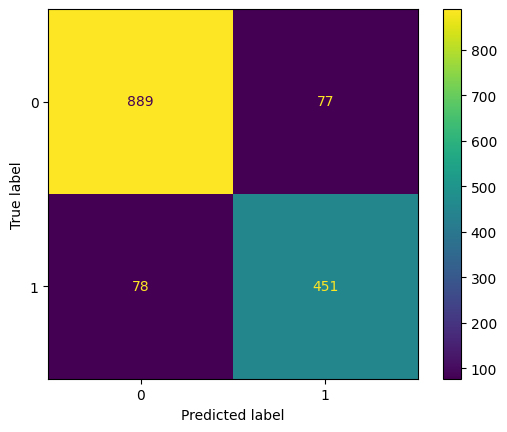

In [128]:


# Inicialización del clasificador KNN
clasificador_KNN2 = KNeighborsClassifier()

# Definición del grid de hiperparámetros
# Se prueban distintos vecinos, distancias y formas de ponderar
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 15],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'weights': ['uniform', 'distance'],
}

# Inicialización de GridSearchCV con validación cruzada
grid_search = GridSearchCV(clasificador_KNN2, param_grid, cv=5, n_jobs=-1)

# Entrenamiento con búsqueda de los mejores hiperparámetros
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros encontrados
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

# Crear el clasificador con los mejores valores encontrados
clasificador_KNN2 = KNeighborsClassifier(**best_params)

# Entrenamiento del modelo optimizado
clasificador_KNN2.fit(X_train, y_train)

# Predicciones sobre el conjunto de test
predicciones_KNN2 = clasificador_KNN2.predict(X_test)

# Matriz de confusión
ConfusionMatrixDisplay.from_predictions(y_test, predicciones_KNN2)

# Cálculo de métricas
accuracy_KNN2 = accuracy_score(y_test, predicciones_KNN2)
precision_KNN2 = precision_score(y_test, predicciones_KNN2, average='weighted')

# Mostrar resultados
print(f"Exactitud: {accuracy_KNN2:.4f}")
print(f"Precisión: {precision_KNN2:.4f}")

# Fase 4: Entrenamiento del modelo y realización de las predicciones y Fase 5: Validación del modelo (RL)

Exactitud: 0.8301
Precisión: 0.8280


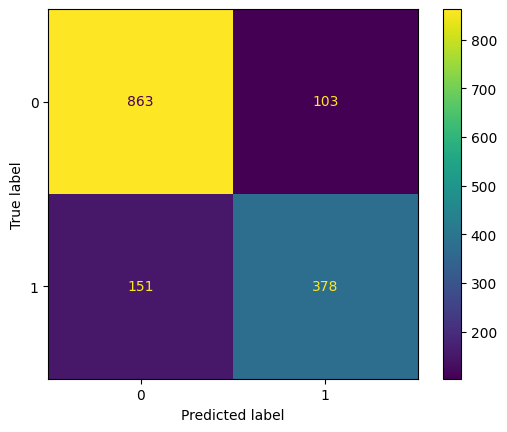

In [129]:
from sklearn.linear_model import LogisticRegression

# Inicialización del clasificador
clasificador_RL = LogisticRegression(max_iter=1000)

# Entrenamiento del clasificador
clasificador_RL.fit(X_train, y_train)

# Realización de las predicciones
predicciones_RL = clasificador_RL.predict(X_test)

# Creación de la matriz de confusión
ConfusionMatrixDisplay.from_predictions(y_test, predicciones_RL);

# Cálculo de varias métricas de rendimiento
accuracy_RL = accuracy_score(y_test, predicciones_RL)
precision_RL = precision_score(y_test, predicciones_RL, average='weighted')
print(f"Exactitud: {accuracy_RL:.4f}")
print(f"Precisión: {precision_RL:.4f}")

## Fase 6: Optimitzación del modelo y Fase 7: Validación del nuevo

Mejores hiperparámetros: {'C': 0.1, 'penalty': 'l2'}
Exactitud: 0.8314
Precisión: 0.8294


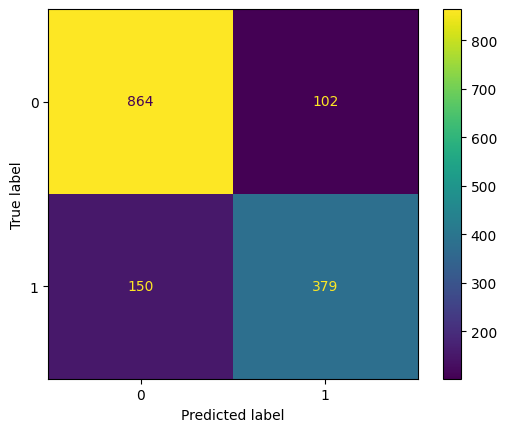

In [130]:
# Inicialización del clasificador
clasificador_LR2 = LogisticRegression(solver='liblinear')

# Definición del grid de hiperparámetros
# La regularización evita que el modelo se sobreajuste a los datos de entrenamiento
# C controla la intensidad de esa regularización (valores bajos = más regularización)
# penalty indica el tipo de regularización a aplicar (en este caso L2 = Ridge)
param_grid = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l2']
}

# Inicialización de GridSearchCV con validación cruzada
grid_search = GridSearchCV(clasificador_LR2, param_grid, cv=5, n_jobs=-1)

# Entrenamiento con búsqueda de los mejores hiperparámetros
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros encontrados
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

# Crear el clasificador con los mejores valores encontrados
clasificador_LR2 = LogisticRegression(solver='liblinear', **best_params)

# Entrenamiento del modelo optimizado
clasificador_LR2.fit(X_train, y_train)

# Predicciones sobre el conjunto de test
predicciones_LR2 = clasificador_LR2.predict(X_test)

# Matriz de confusión
ConfusionMatrixDisplay.from_predictions(y_test, predicciones_LR2)

# Cálculo de métricas
accuracy_LR2  = accuracy_score(y_test, predicciones_LR2)
precision_LR2 = precision_score(y_test, predicciones_LR2, average='weighted')

# Mostrar resultados
print(f"Exactitud: {accuracy_LR2:.4f}")
print(f"Precisión: {precision_LR2:.4f}")

# Fase 4: Entrenamiento del modelo y realización de las predicciones y Fase 5: Validación del modelo (SVC)

Exactitud: 0.9211
Precisión: 0.9208


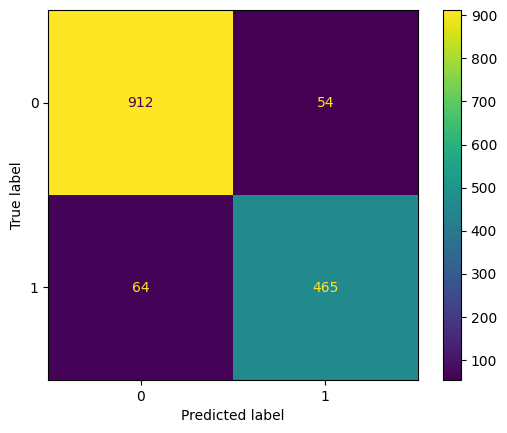

In [131]:
# Inicialización del clasificador
clasificador_SVC = SVC()

# Entrenamiento del clasificador
clasificador_SVC.fit(X_train, y_train)

# Realización de las predicciones
predicciones_SVC = clasificador_SVC.predict(X_test)

# Creación de la matriz de confusión
ConfusionMatrixDisplay.from_predictions(y_test, predicciones_SVC);

# Cálculo de varias métricas de rendimiento
accuracy_SVC = accuracy_score(y_test, predicciones_SVC)
precision_SVC = precision_score(y_test, predicciones_SVC, average='weighted')
print(f"Exactitud: {accuracy_SVC:.4f}")
print(f"Precisión: {precision_SVC:.4f}")

## Fase 6: Optimitzación del modelo y Fase 7: Validación del nuevo modelo (SVC)

Mejores hiperparámetros: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Exactitud: 0.9264
Precisión: 0.9262


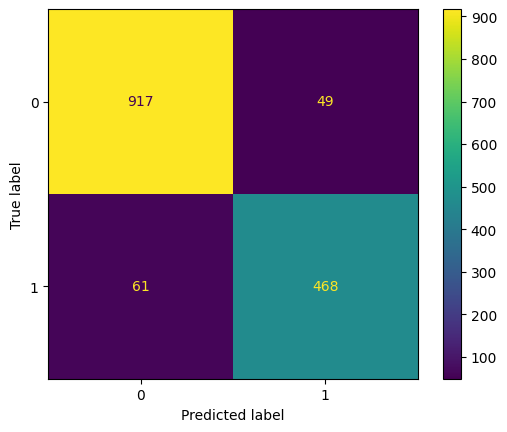

In [132]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, ConfusionMatrixDisplay

# Inicialización del clasificador SVC
clasificador_SVC2 = SVC()

# Definición del grid de hiperparámetros
# C controla la regularización (valores bajos = modelo más simple)
# kernel define la forma del límite de decisión
# gamma influye en el alcance de cada muestra como soporte (solo para RBF y sigmoid)
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Búsqueda de los mejores hiperparámetros
grid_search = GridSearchCV(clasificador_SVC2, param_grid, cv=5, n_jobs=-1)

# Entrenamiento del modelo
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros encontrados
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

# Crear y entrenar el modelo final con los mejores hiperparámetros
clasificador_SVC2 = SVC(**best_params)
clasificador_SVC2.fit(X_train, y_train)

# Predicciones sobre el conjunto de test
predicciones_SVC2 = clasificador_SVC2.predict(X_test)

# Matriz de confusión
ConfusionMatrixDisplay.from_predictions(y_test, predicciones_SVC2)

# Cálculo de métricas
accuracy_SVC2 = accuracy_score(y_test, predicciones_SVC2)
precision_SVC2 = precision_score(y_test, predicciones_SVC2, average='weighted')

# Mostrar resultados
print(f"Exactitud: {accuracy_SVC2:.4f}")
print(f"Precisión: {precision_SVC2:.4f}")

# Fase 4: Entrenamiento del modelo y realización de las predicciones y Fase 5: Validación del modelo (DT)

Exactitud: 0.9900
Precisión: 0.9900


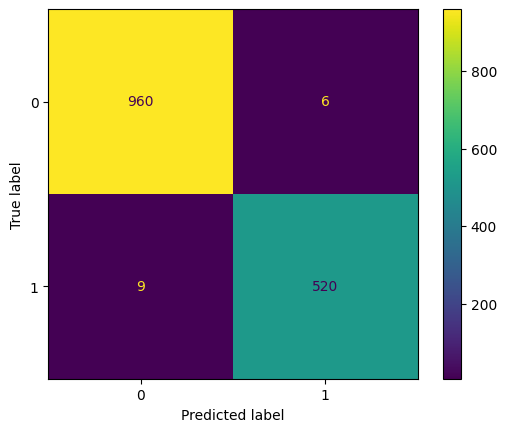

In [133]:
# Inicialización del clasificador
clasificador_DT = DecisionTreeClassifier(random_state=42)

# Entrenamiento del clasificador
clasificador_DT.fit(X_train, y_train)

# Realización de las predicciones
predicciones_DT = clasificador_DT.predict(X_test)

# Creación de la matriz de confusión
ConfusionMatrixDisplay.from_predictions(y_test, predicciones_DT);

# Cálculo de varias métricas de rendimiento
accuracy_DT = accuracy_score(y_test, predicciones_DT)
precision_DT = precision_score(y_test, predicciones_DT, average='weighted')
print(f"Exactitud: {accuracy_DT:.4f}")
print(f"Precisión: {precision_DT:.4f}")

## Fase 6: Optimitzación del modelo y Fase 7: Validación del nuevo modelo (DT)

Mejores hiperparámetros: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Exactitud: 0.9886
Precisión: 0.9888


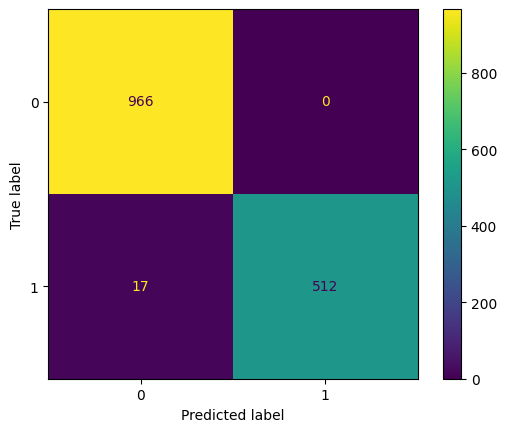

In [134]:
# Inicialización del clasificador
clasificador_DT2 = DecisionTreeClassifier(random_state=42)

# Grid de hiperparámetros
param_grid = {
    'max_depth': [3, 5, 10, None],               # Máxima profundidad del árbol (None = sin límite)
    'min_samples_split': [2, 5, 10],             # Mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 4],               # Mínimo de muestras en cada hoja (evita ramas muy pequeñas)
    'criterion': ['gini', 'entropy']             # Método para calcular la calidad de las divisiones
}

# Búsqueda de hiperparámetros
grid_search = GridSearchCV(clasificador_DT2, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Mejor configuración encontrada
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

# Modelo final con mejor configuración
clasificador_DT2 = DecisionTreeClassifier(random_state=42, **best_params)
clasificador_DT2.fit(X_train, y_train)

# Predicción y evaluación
predicciones_DT2 = clasificador_DT2.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, predicciones_DT2)
accuracy_DT2 = accuracy_score(y_test, predicciones_DT2)
precision_DT2 = precision_score(y_test, predicciones_DT2, average='weighted')
print(f"Exactitud: {accuracy_DT2:.4f}")
print(f"Precisión: {precision_DT2:.4f}")

# Fase 4: Entrenamiento del modelo y realización de las predicciones y Fase 5: Validación del modelo (RF)

Exactitud: 0.9886
Precisión: 0.9888


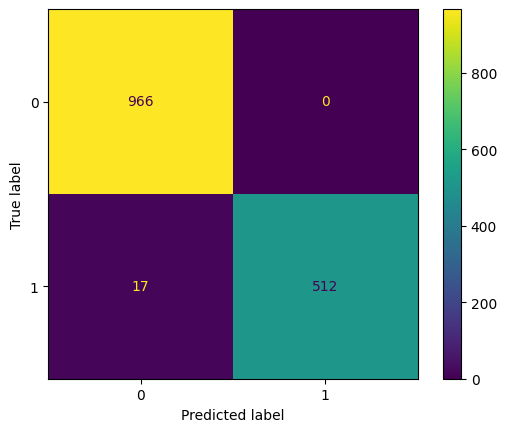

In [135]:
from sklearn.ensemble import RandomForestClassifier

# Inicialización del clasificador
clasificador_RF = RandomForestClassifier(random_state=42)

# Entrenamiento del clasificador
clasificador_RF.fit(X_train, y_train)

# Realización de las predicciones
predicciones_RF = clasificador_RF.predict(X_test)

# Creación de la matriz de confusión
ConfusionMatrixDisplay.from_predictions(y_test, predicciones_RF);

# Cálculo de varias métricas de rendimiento
accuracy_RF = accuracy_score(y_test, predicciones_RF)
precision_RF = precision_score(y_test, predicciones_RF, average='weighted')
print(f"Exactitud: {accuracy_RF:.4f}")
print(f"Precisión: {precision_RF:.4f}")

## Fase 6: Optimitzación del modelo y Fase 7: Validación del nuevo modelo (RF)

Mejores hiperparámetros: {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Exactitud: 0.9886
Precisión: 0.9888


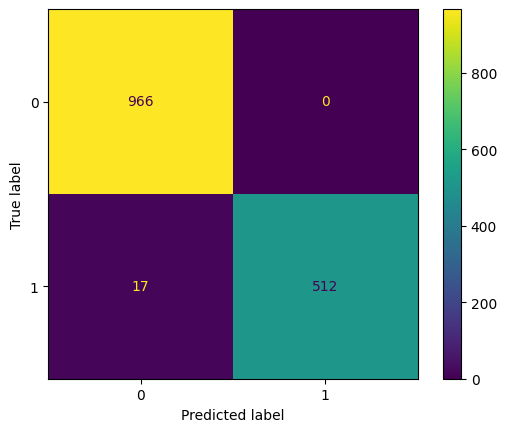

In [136]:
# Inicialización del clasificador
clasificador_RF2 = RandomForestClassifier(random_state=42)

# Grid de hiperparámetros
param_grid = {
    'n_estimators': [100, 200, 300],             # Nº de árboles del bosque
    'max_depth': [None, 10, 20],                 # Profundidad máxima por árbol
    'min_samples_split': [2, 5],                 # Mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2],                  # Mínimo de muestras en una hoja
    'max_features': ['sqrt', 'log2'],            # Nº de variables consideradas en cada división
    'bootstrap': [True, False]                   # Si se usan muestras con reemplazo (bootstrapping)
}

# Búsqueda de hiperparámetros
grid_search = GridSearchCV(clasificador_RF2, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Mejor configuración encontrada
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

# Modelo final con mejor configuración
clasificador_RF2 = RandomForestClassifier(random_state=42, **best_params)
clasificador_RF2.fit(X_train, y_train)

# Predicción y evaluación
predicciones_RF2 = clasificador_RF2.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, predicciones_RF2)
accuracy_RF2 = accuracy_score(y_test, predicciones_RF2)
precision_RF2 = precision_score(y_test, predicciones_RF2, average='weighted')
print(f"Exactitud: {accuracy_RF2:.4f}")
print(f"Precisión: {precision_RF2:.4f}")

# Fase 4: Entrenamiento del modelo y realización de las predicciones y Fase 5: Validación del modelo (Adaboost)

Exactitud: 0.9886
Precisión: 0.9888


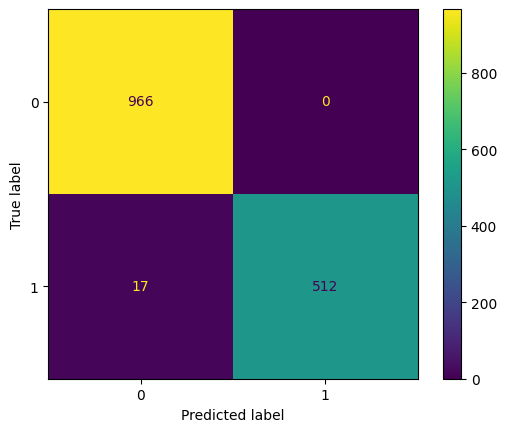

In [137]:
# Inicialización del clasificador
clasificador_AB = AdaBoostClassifier(random_state=42)

# Entrenamiento del clasificador
clasificador_AB.fit(X_train, y_train)

# Realización de las predicciones
predicciones_AB = clasificador_AB.predict(X_test)

# Creación de la matriz de confusión
ConfusionMatrixDisplay.from_predictions(y_test, predicciones_AB);

# Cálculo de varias métricas de rendimiento
accuracy_AB = accuracy_score(y_test, predicciones_AB)
precision_AB = precision_score(y_test, predicciones_AB, average='weighted')
print(f"Exactitud: {accuracy_AB:.4f}")
print(f"Precisión: {precision_AB:.4f}")

## Fase 6: Optimitzación del modelo y Fase 7: Validación del nuevo modelo (Adaboost)

Mejores hiperparámetros: {'learning_rate': 1.0, 'n_estimators': 200}
Exactitud: 0.9886
Precisión: 0.9888


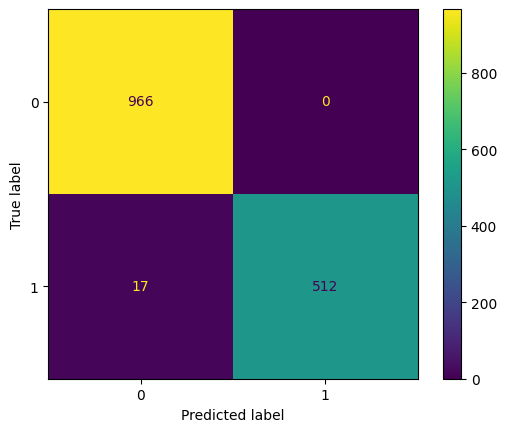

In [138]:
from sklearn.ensemble import AdaBoostClassifier

# Inicialización del clasificador
clasificador_AB2 = AdaBoostClassifier(random_state=42)

# Grid de hiperparámetros
param_grid = {
    'n_estimators': [50, 100, 200],              # Nº de clasificadores débiles (pasos de boosting)
    'learning_rate': [0.1, 0.5, 1.0, 1.5],       # Cuánto se ajusta el modelo en cada iteración

}

# Búsqueda de hiperparámetros
grid_search = GridSearchCV(clasificador_AB2, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Mejor configuración encontrada
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

# Modelo final con mejor configuración
clasificador_AB2 = AdaBoostClassifier(random_state=42, **best_params)
clasificador_AB2.fit(X_train, y_train)

# Predicción y evaluación
predicciones_AB2 = clasificador_AB2.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, predicciones_AB2)
accuracy_AB2 = accuracy_score(y_test, predicciones_AB2)
precision_AB2 = precision_score(y_test, predicciones_AB2, average='weighted')
print(f"Exactitud: {accuracy_AB2:.4f}")
print(f"Precisión: {precision_AB2:.4f}")

In [139]:
#Gemini

# Create a dictionary with the results
results = {
    'Modelo': ['Naive Bayes', 'K-Nearest Neighbors', 'Regresión Logística', 'Support Vector Machine', 'Árbol de Decisión', 'Random Forest', 'AdaBoost'],
    'Exactitud_antes': [accuracy_NB, accuracy_KNN, accuracy_RL, accuracy_SVC, accuracy_DT, accuracy_RF, accuracy_AB],
    'Precisión_antes': [precision_NB, precision_KNN, precision_RL, precision_SVC, precision_DT, precision_RF, precision_AB],
    'Exactitud_Después': [accuracy_NB2, accuracy_KNN2, accuracy_RL2, accuracy_SVC2, accuracy_DT2, accuracy_RF2, accuracy_AB2],
    'Precisión_Después': [precision_NB2, precision_KNN2, precision_RL2, precision_SVC2, precision_DT2, precision_RF2, precision_AB2]
}

# Create a pandas DataFrame
results_df = pd.DataFrame(results)

# Display the DataFrame
display(results_df)

,Modelo,Exactitud_antes,Precisión_antes,Exactitud_Después,Precisión_Después
0,Naive Bayes,0.864214,0.862993,0.864214,0.862993
1,K-Nearest Neighbors,0.871572,0.871684,0.896321,0.896277
2,Regresión Logística,0.830100,0.828006,0.831438,0.829379
3,Support Vector Machine,0.921070,0.920813,0.926421,0.926161
4,Árbol de Decisión,0.989967,0.989962,0.988629,0.988825
5,Random Forest,0.988629,0.988825,0.988629,0.988825
6,AdaBoost,0.988629,0.988825,0.988629,0.988825


# Conclusiones

Todo apunta a que aquellos algoritmos basados en árboles de decisión, en su version en conjunto o de manera individual, son más capaces de acertar en sus predicciones y tener un buen balance en su matriz de confusión. Todo este tipo de algoritmos estadísticos presentan buen rendimiento, por lo que debido a razones de eficiencia y eficacia, propongo DT (DecissionTree), sin optimizar, como mejor_modelo

# Pruebas

## Guardar Modelo

In [140]:
import joblib
import os

# Asignar el modelo con mejor rendimiento
mejor_modelo = clasificador_DT

# Ruta donde guardar el modelo
ruta_save =  '/content/drive/MyDrive/IAUOC/SAA/2/save_models/'

# Crear el directorio si no existe
os.makedirs(ruta_save, exist_ok=True)

# Definir ruta completa del archivo
ruta_modelo = os.path.join(ruta_save, "mejor_modelo.pkl")

# Guardar el modelo entrenado
joblib.dump(mejor_modelo, ruta_modelo)
print(f"Modelo guardado en: {ruta_modelo}")

Modelo guardado en: /content/drive/MyDrive/IAUOC/SAA/2/save_models/mejor_modelo.pkl


## Cargar Modelo

In [141]:
ruta_save =  '/content/drive/MyDrive/IAUOC/SAA/2/save_models/'

In [142]:
# Importar librerías necesarias
from google.colab import drive
import joblib
import os

# Montar Google Drive
drive.mount('/content/drive')

# Definir la ruta donde guardaste el modelo

ruta_modelo = os.path.join(ruta_save, "mejor_modelo.pkl")

# Cargar el modelo sin necesidad de volver a entrenarlo
mejor_modelo = joblib.load(ruta_modelo)
print("¡Modelo cargado correctamente!")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
¡Modelo cargado correctamente!


## Sobreajuste sí o no

In [143]:
# Parece estable y generaliza bien
from sklearn.model_selection import cross_val_score

# Evaluación con validación cruzada sobre los datos de entrenamiento
cv_scores = cross_val_score(mejor_modelo, X_train, y_train, cv=5, scoring='accuracy')

print(f"Precisión media en validación cruzada: {cv_scores.mean():.4f} - Desviación estándar: {cv_scores.std():.4f}")

Precisión media en validación cruzada: 0.9888 - Desviación estándar: 0.0045


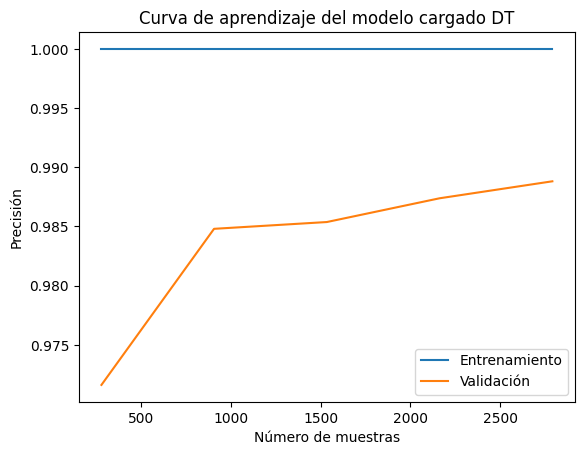

In [144]:
"""
La precisión en entrenamiento se mantiene estable alrededor de 0.975. La precisión en validación mejora
progresivamente al aumentar el número de muestras, alcanzando un valor cercano a 0.967.
La diferencia entre ambas curvas es pequeña, lo que indica buen ajuste y buena capacidad de generalización del modelo.
"""
from sklearn.model_selection import learning_curve

mejor_modelo = clasificador_DT

# Calcular la curva de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(mejor_modelo, X_train, y_train, cv=5, scoring='accuracy')

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Entrenamiento')
plt.plot(train_sizes, test_mean, label='Validación')
plt.xlabel('Número de muestras')
plt.ylabel('Precisión')
plt.legend()
plt.title('Curva de aprendizaje del modelo cargado DT')
plt.show()

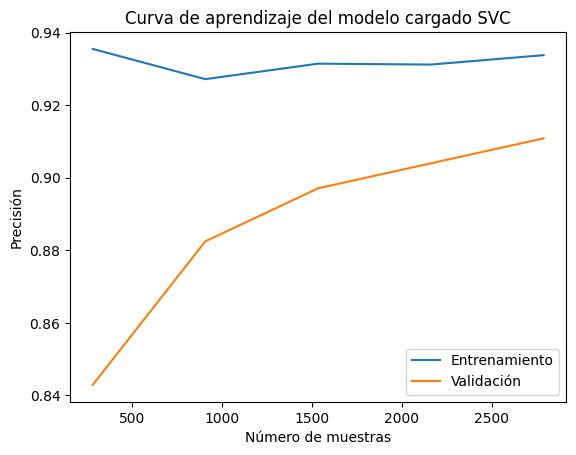

In [145]:
"""
La precisión en entrenamiento se mantiene estable alrededor de 0.975. La precisión en validación mejora
progresivamente al aumentar el número de muestras, alcanzando un valor cercano a 0.967.
La diferencia entre ambas curvas es pequeña, lo que indica buen ajuste y buena capacidad de generalización del modelo.
"""
from sklearn.model_selection import learning_curve

mejor_modelo = clasificador_SVC

# Calcular la curva de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(mejor_modelo, X_train, y_train, cv=5, scoring='accuracy')

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Entrenamiento')
plt.plot(train_sizes, test_mean, label='Validación')
plt.xlabel('Número de muestras')
plt.ylabel('Precisión')
plt.legend()
plt.title('Curva de aprendizaje del modelo cargado SVC')
plt.show()

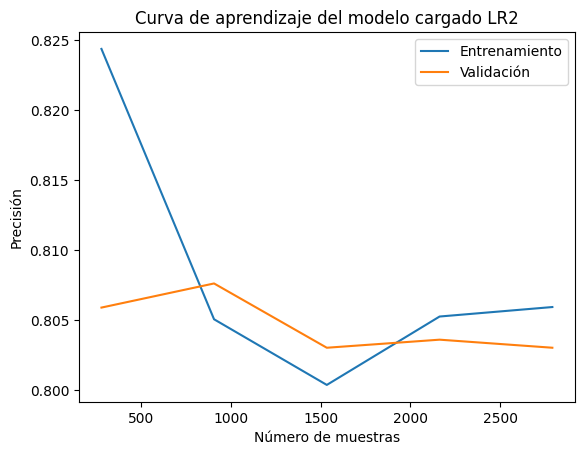

In [146]:
"""
La precisión en entrenamiento se mantiene estable alrededor de 0.975. La precisión en validación mejora
progresivamente al aumentar el número de muestras, alcanzando un valor cercano a 0.967.
La diferencia entre ambas curvas es pequeña, lo que indica buen ajuste y buena capacidad de generalización del modelo.
"""
from sklearn.model_selection import learning_curve

mejor_modelo = clasificador_LR2

# Calcular la curva de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(mejor_modelo, X_train, y_train, cv=5, scoring='accuracy')

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Entrenamiento')
plt.plot(train_sizes, test_mean, label='Validación')
plt.xlabel('Número de muestras')
plt.ylabel('Precisión')
plt.legend()
plt.title('Curva de aprendizaje del modelo cargado LR2')
plt.show()

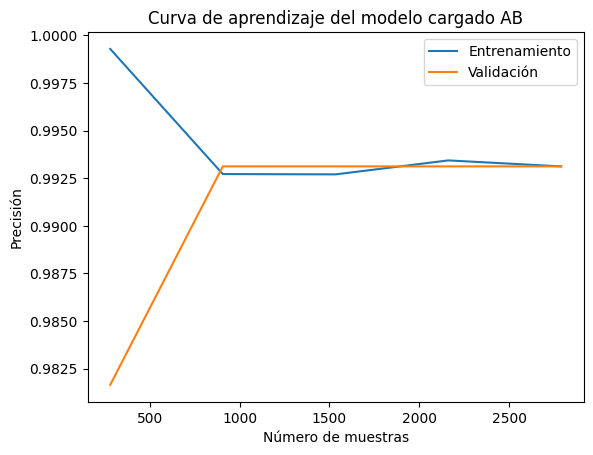

In [147]:
"""
La precisión en entrenamiento se mantiene estable alrededor de 0.975. La precisión en validación mejora
progresivamente al aumentar el número de muestras, alcanzando un valor cercano a 0.967.
La diferencia entre ambas curvas es pequeña, lo que indica buen ajuste y buena capacidad de generalización del modelo.
"""
from sklearn.model_selection import learning_curve

mejor_modelo = clasificador_AB

# Calcular la curva de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(mejor_modelo, X_train, y_train, cv=5, scoring='accuracy')

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Entrenamiento')
plt.plot(train_sizes, test_mean, label='Validación')
plt.xlabel('Número de muestras')
plt.ylabel('Precisión')
plt.legend()
plt.title('Curva de aprendizaje del modelo cargado AB')
plt.show()

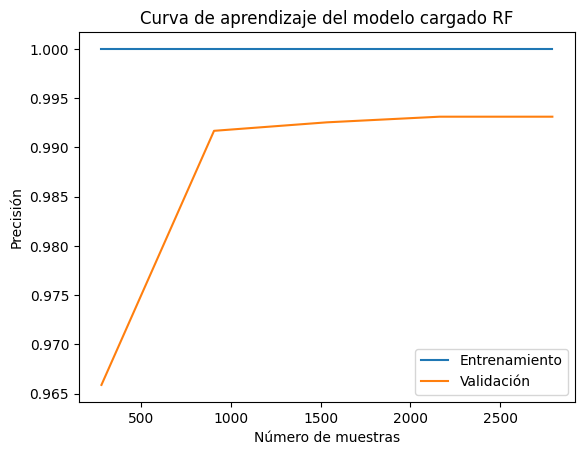

In [148]:
"""
La precisión en entrenamiento se mantiene estable alrededor de 0.975. La precisión en validación mejora
progresivamente al aumentar el número de muestras, alcanzando un valor cercano a 0.967.
La diferencia entre ambas curvas es pequeña, lo que indica buen ajuste y buena capacidad de generalización del modelo.
"""
from sklearn.model_selection import learning_curve

mejor_modelo = clasificador_RF

# Calcular la curva de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(mejor_modelo, X_train, y_train, cv=5, scoring='accuracy')

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Entrenamiento')
plt.plot(train_sizes, test_mean, label='Validación')
plt.xlabel('Número de muestras')
plt.ylabel('Precisión')
plt.legend()
plt.title('Curva de aprendizaje del modelo cargado RF')
plt.show()

## Nuevas predicciones - Adaboost: MEJOR MODELO

In [149]:
mejor_modelo = clasificador_AB

In [150]:
newDataContrast

,SoilPH,AvgDailySunlight,WateringFrequency,GrowthDays,FertilizerQuantity,PlantType,PesticideUsed,ContainerSize,UrbanZone,SuccessfulHarvest
2339,6.04,8.7,2.0,87.0,198.0,Fruit,Yes,Small,B,1
155,6.00,6.0,6.0,96.0,150.0,Leafy,No,Large,C,0
4243,6.99,7.2,4.0,77.0,106.0,Root,No,Medium,B,1
1446,6.13,7.1,6.0,74.0,150.0,Leafy,No,Medium,A,1
4962,6.41,2.0,2.0,84.0,178.0,Root,No,Medium,C,0
...,...,...,...,...,...,...,...,...,...,...
1755,7.46,4.0,3.0,99.0,80.0,Root,Yes,Large,B,0
4545,6.91,6.0,5.0,57.0,145.0,Root,No,Medium,B,0
742,6.06,7.2,5.0,68.0,151.0,Fruit,No,Small,C,0
923,6.01,8.4,4.0,76.0,153.0,Leafy,Yes,Small,A,1


In [151]:
# from google.colab import drive
# drive.mount('/content/drive')

# ruta = '/content/drive/MyDrive/IAUOC/SAA/2/urban_cultivation.csv'
# df = pd.read_csv(ruta)

## Preprocesado

In [152]:
# by Gemini - YA ESTA HECHO en newDataContrast

# df = df.drop(['PlotID', 'SensorBatchCode'], axis=1)
# df.loc[:, 'SoilPH'] = df['SoilPH'].fillna(df['SoilPH'].median())
# df.loc[:, 'FertilizerQuantity'] = df['FertilizerQuantity'].fillna(df['FertilizerQuantity'].median())
# df['PlantType'] = df['PlantType'].replace({
#     'leafy': 'Leafy',
#     'Fruits': 'Fruit',
#     'Rt': 'Root'
# })
# df['PesticideUsed'] = df['PesticideUsed'].str.capitalize()
# df['ContainerSize'] = df['ContainerSize'].replace({
#     'medium': 'Medium',
#     'L': 'Large'
# })
# df = df.drop_duplicates()
# df['SuccessfulHarvest'] = df['SuccessfulHarvest'].map({'Yes': 1, 'No': 0})

In [153]:
# by Gemini

num_cols = df.select_dtypes(exclude="object").columns

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR
    df = df[(df[col] >= lim_inf) & (df[col] <= lim_sup)]

## Encoders y Labels

In [154]:
# by Gemini

X = df.drop("SuccessfulHarvest", axis=1)
y = df["SuccessfulHarvest"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

cat_cols = X_train.select_dtypes(include="object").columns
num_cols = X_train.select_dtypes(exclude="object").columns

encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col]  = le.transform(X_test[col])
    encoders[col] = le

scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols]  = scaler.transform(X_test[num_cols])

# clasificador_RL = LogisticRegression(max_iter=1000)
clasificador_RL.fit(X_train, y_train)
coeficientes = clasificador_RL.coef_[0]
interseccion = clasificador_RL.intercept_[0]

A continuación, calculamos 5 observaciones límite. 1 observación muy alta (linealmente) o máxima, 1 observación muy baja linealmente o mínima y 3 observaciones límite en tanto polinomio debido a Regresión Logistica, como frontera relevante de datos cuya clasificación es crítica o ambigua.

In [155]:
# By Gemini:
# Calculate the value of the linear equation for each observation in the original (cleaned) df
# We need to re-apply the LabelEncoder and use the scaler to transform the entire 'df' first
df_encoded = df.copy()
for col, encoder in encoders.items():
    df_encoded[col] = encoder.transform(df_encoded[col])

# Scale the numerical columns of the encoded original df
df_scaled_original = df_encoded.copy()
df_scaled_original[num_cols] = scaler.transform(df_scaled_original[num_cols])

# Calculate the linear combination for the scaled original df, excluding the target variable for the dot product
linear_combination_original_df = df_scaled_original.drop("SuccessfulHarvest", axis=1).dot(coeficientes) + interseccion

# Find the index of the observation with the maximum linear combination value
max_observation_index = linear_combination_original_df.idxmax()

# Get the original observation and its target from the cleaned df
max_observation_original_df = df.loc[max_observation_index]
max_observation_target = df.loc[max_observation_index, 'SuccessfulHarvest']

print(f"La observación en el DataFrame original (limpio) con el valor máximo de la combinación lineal y su target es:\n{max_observation_original_df}\nTarget: {max_observation_target}")

# Find the index of the observation with the minimum linear combination value
min_observation_index = linear_combination_original_df.idxmin()

# Get the original observation and its target from the cleaned df
min_observation_original_df = df.loc[min_observation_index]
min_observation_target = df.loc[min_observation_index, 'SuccessfulHarvest']

print(f"\nLa observación en el DataFrame original (limpio) con el valor mínimo de la combinación lineal y su target es:\n{min_observation_original_df}\nTarget: {min_observation_target}")

# Find the indices of the observations closest to the decision boundary (closest to 0)
# Sort the absolute values of the linear combination and get the first 3 indices
closest_observation_indices = abs(linear_combination_original_df).sort_values().head(3).index.tolist()

print("\nLas 3 observaciones en el DataFrame original (limpio) más cercanas al límite de decisión y sus targets son:")
for index in closest_observation_indices:
    closest_observation_original_df = df.loc[index]
    closest_observation_target = df.loc[index, 'SuccessfulHarvest']
    print(f"\nObservación (índice {index}):\n{closest_observation_original_df}\nTarget: {closest_observation_target}")

La observación en el DataFrame original (limpio) con el valor máximo de la combinación lineal y su target es:
SoilPH                  6.79
AvgDailySunlight        11.4
WateringFrequency        7.0
GrowthDays              72.0
FertilizerQuantity     136.0
PlantType              Fruit
PesticideUsed             No
ContainerSize         Medium
UrbanZone                  B
SuccessfulHarvest          1
Name: 338, dtype: object
Target: 1

La observación en el DataFrame original (limpio) con el valor mínimo de la combinación lineal y su target es:
SoilPH                 7.07
AvgDailySunlight        2.0
WateringFrequency       5.0
GrowthDays             67.0
FertilizerQuantity     80.0
PlantType              Root
PesticideUsed            No
ContainerSize         Large
UrbanZone                 A
SuccessfulHarvest         0
Name: 2408, dtype: object
Target: 0

Las 3 observaciones en el DataFrame original (limpio) más cercanas al límite de decisión y sus targets son:

Observación (índice 168):
So

Lanzamos predict contra **clasificador_AB**: Nuestro modelo elegido. Despues compararemos con LR2

In [156]:
#By gemini:

# Select the observations from the original cleaned dataframe
critical_observations_df = df.loc[closest_observation_indices + [max_observation_index, min_observation_index]].copy()

# Separate features and target for these observations
critical_X = critical_observations_df.drop("SuccessfulHarvest", axis=1)
critical_y = critical_observations_df["SuccessfulHarvest"]

# Apply the same LabelEncoders fitted on the training data
critical_X_encoded = critical_X.copy()
for col, encoder in encoders.items():
    critical_X_encoded[col] = encoder.transform(critical_X_encoded[col])

# Apply the same StandardScaler fitted on the training data
critical_X_scaled = critical_X_encoded.copy()
critical_X_scaled[num_cols] = scaler.transform(critical_X_scaled[num_cols])

# Use the trained Logistic Regression model to make predictions on these critical observations
# critical_predictions_RL = clasificador_RL.predict(critical_X_scaled)
critical_predictions_RL = clasificador_AB.predict(critical_X_scaled)

# Display the original critical observations and their predicted targets
print("Observaciones Críticas (Originales) y Predicciones:")
critical_results = critical_observations_df.copy()
critical_results['Predicted_SuccessfulHarvest'] = critical_predictions_RL
display(critical_results)

# You can also compare with the actual targets
print("\nComparación de Targets Reales y Predicciones:")
comparison_df = pd.DataFrame({
    'Actual_Target': critical_y,
    'Predicted_Target': critical_predictions_RL
})
display(comparison_df)

Observaciones Críticas (Originales) y Predicciones:


,SoilPH,AvgDailySunlight,WateringFrequency,GrowthDays,FertilizerQuantity,PlantType,PesticideUsed,ContainerSize,UrbanZone,SuccessfulHarvest,Predicted_SuccessfulHarvest
168,6.33,7.4,4.0,65.0,119.0,Leafy,No,Medium,A,0,0
1845,5.78,6.7,5.0,78.0,150.0,Fruit,No,Medium,C,1,1
3283,7.11,8.0,4.0,66.0,80.0,Leafy,No,Medium,B,0,0
338,6.79,11.4,7.0,72.0,136.0,Fruit,No,Medium,B,1,1
2408,7.07,2.0,5.0,67.0,80.0,Root,No,Large,A,0,0



Comparación de Targets Reales y Predicciones:


,Actual_Target,Predicted_Target
168,0,0
1845,1,1
3283,0,0
338,1,1
2408,0,0


Comparamos con **LR2**

In [157]:
#By gemini:

# Select the observations from the original cleaned dataframe
critical_observations_df = df.loc[closest_observation_indices + [max_observation_index, min_observation_index]].copy()

# Separate features and target for these observations
critical_X = critical_observations_df.drop("SuccessfulHarvest", axis=1)
critical_y = critical_observations_df["SuccessfulHarvest"]

# Apply the same LabelEncoders fitted on the training data
critical_X_encoded = critical_X.copy()
for col, encoder in encoders.items():
    critical_X_encoded[col] = encoder.transform(critical_X_encoded[col])

# Apply the same StandardScaler fitted on the training data
critical_X_scaled = critical_X_encoded.copy()
critical_X_scaled[num_cols] = scaler.transform(critical_X_scaled[num_cols])

# Use the trained Logistic Regression model to make predictions on these critical observations
# critical_predictions_RL = clasificador_RL.predict(critical_X_scaled)
critical_predictions_RL = clasificador_LR2.predict(critical_X_scaled)

# Display the original critical observations and their predicted targets
print("Observaciones Críticas (Originales) y Predicciones:")
critical_results = critical_observations_df.copy()
critical_results['Predicted_SuccessfulHarvest'] = critical_predictions_RL
display(critical_results)

# You can also compare with the actual targets
print("\nComparación de Targets Reales y Predicciones:")
comparison_df = pd.DataFrame({
    'Actual_Target': critical_y,
    'Predicted_Target': critical_predictions_RL
})
display(comparison_df)

Observaciones Críticas (Originales) y Predicciones:


,SoilPH,AvgDailySunlight,WateringFrequency,GrowthDays,FertilizerQuantity,PlantType,PesticideUsed,ContainerSize,UrbanZone,SuccessfulHarvest,Predicted_SuccessfulHarvest
168,6.33,7.4,4.0,65.0,119.0,Leafy,No,Medium,A,0,1
1845,5.78,6.7,5.0,78.0,150.0,Fruit,No,Medium,C,1,0
3283,7.11,8.0,4.0,66.0,80.0,Leafy,No,Medium,B,0,1
338,6.79,11.4,7.0,72.0,136.0,Fruit,No,Medium,B,1,1
2408,7.07,2.0,5.0,67.0,80.0,Root,No,Large,A,0,0



Comparación de Targets Reales y Predicciones:


,Actual_Target,Predicted_Target
168,0,1
1845,1,0
3283,0,1
338,1,1
2408,0,0


Uso de newDataContrast. El objetivo es comprobar si los modelos generalizan bien y cuál es el mejor

newDataContrast Observaciones y Predicciones:


,SoilPH,AvgDailySunlight,WateringFrequency,GrowthDays,FertilizerQuantity,PlantType,PesticideUsed,ContainerSize,UrbanZone,SuccessfulHarvest,Predicted_SuccessfulHarvest
2339,6.04,8.7,2.0,87.0,198.0,Fruit,Yes,Small,B,1,1
155,6.00,6.0,6.0,96.0,150.0,Leafy,No,Large,C,0,0
4243,6.99,7.2,4.0,77.0,106.0,Root,No,Medium,B,1,1
1446,6.13,7.1,6.0,74.0,150.0,Leafy,No,Medium,A,1,1
4962,6.41,2.0,2.0,84.0,178.0,Root,No,Medium,C,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1755,7.46,4.0,3.0,99.0,80.0,Root,Yes,Large,B,0,0
4545,6.91,6.0,5.0,57.0,145.0,Root,No,Medium,B,0,0
742,6.06,7.2,5.0,68.0,151.0,Fruit,No,Small,C,0,0
923,6.01,8.4,4.0,76.0,153.0,Leafy,Yes,Small,A,1,1



Comparación de Targets Reales y Predicciones en newDataContrast:


,Actual_Target,Predicted_Target
2339,1,1
155,0,0
4243,1,1
1446,1,1
4962,0,0
...,...,...
1755,0,0
4545,0,0
742,0,0
923,1,1



Matriz de Confusión para newDataContrast:


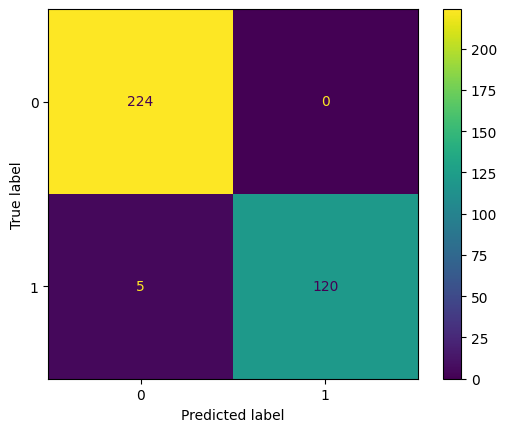

In [158]:
# By gemini

# Select the observations from the original cleaned dataframe
# Use newDataContrast directly
newDataContrast_processed = newDataContrast.copy()

# Separate features and target for these observations
newDataContrast_X = newDataContrast_processed.drop("SuccessfulHarvest", axis=1)
newDataContrast_y = newDataContrast_processed["SuccessfulHarvest"]

# Apply the same LabelEncoders fitted on the training data
newDataContrast_X_encoded = newDataContrast_X.copy()
for col, encoder in encoders.items():
    newDataContrast_X_encoded[col] = encoder.transform(newDataContrast_X_encoded[col])

# Apply the same StandardScaler fitted on the training data
newDataContrast_X_scaled = newDataContrast_X_encoded.copy()
newDataContrast_X_scaled[num_cols] = scaler.transform(newDataContrast_X_scaled[num_cols])

# Use the trained Adaboost model (clasificador_AB) to make predictions on newDataContrast
newDataContrast_predictions = clasificador_AB.predict(newDataContrast_X_scaled)

# Display the original newDataContrast observations and their predicted targets
print("newDataContrast Observaciones y Predicciones:")
newDataContrast_results = newDataContrast_processed.copy()
newDataContrast_results['Predicted_SuccessfulHarvest'] = newDataContrast_predictions
display(newDataContrast_results)

# You can also compare with the actual targets
print("\nComparación de Targets Reales y Predicciones en newDataContrast:")
comparison_df_newDataContrast = pd.DataFrame({
    'Actual_Target': newDataContrast_y,
    'Predicted_Target': newDataContrast_predictions
})
display(comparison_df_newDataContrast)

# Create and display the confusion matrix for newDataContrast
print("\nMatriz de Confusión para newDataContrast:")
ConfusionMatrixDisplay.from_predictions(newDataContrast_y, newDataContrast_predictions);

newDataContrast Observaciones y Predicciones:


,SoilPH,AvgDailySunlight,WateringFrequency,GrowthDays,FertilizerQuantity,PlantType,PesticideUsed,ContainerSize,UrbanZone,SuccessfulHarvest,Predicted_SuccessfulHarvest
2339,6.04,8.7,2.0,87.0,198.0,Fruit,Yes,Small,B,1,1
155,6.00,6.0,6.0,96.0,150.0,Leafy,No,Large,C,0,0
4243,6.99,7.2,4.0,77.0,106.0,Root,No,Medium,B,1,0
1446,6.13,7.1,6.0,74.0,150.0,Leafy,No,Medium,A,1,1
4962,6.41,2.0,2.0,84.0,178.0,Root,No,Medium,C,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1755,7.46,4.0,3.0,99.0,80.0,Root,Yes,Large,B,0,0
4545,6.91,6.0,5.0,57.0,145.0,Root,No,Medium,B,0,0
742,6.06,7.2,5.0,68.0,151.0,Fruit,No,Small,C,0,1
923,6.01,8.4,4.0,76.0,153.0,Leafy,Yes,Small,A,1,1



Comparación de Targets Reales y Predicciones en newDataContrast:


,Actual_Target,Predicted_Target
2339,1,1
155,0,0
4243,1,0
1446,1,1
4962,0,0
...,...,...
1755,0,0
4545,0,0
742,0,1
923,1,1



Matriz de Confusión para newDataContrast:


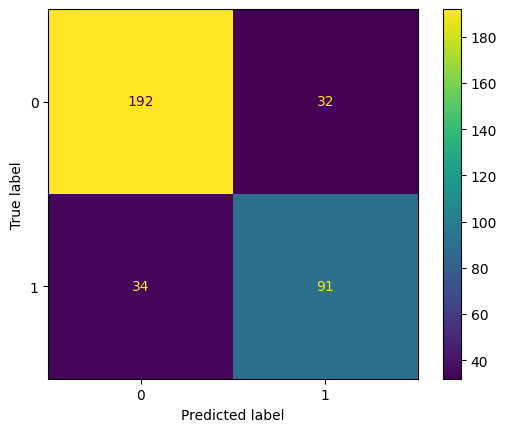

In [159]:
# By gemini

# Select the observations from the original cleaned dataframe
# Use newDataContrast directly
newDataContrast_processed = newDataContrast.copy()

# Separate features and target for these observations
newDataContrast_X = newDataContrast_processed.drop("SuccessfulHarvest", axis=1)
newDataContrast_y = newDataContrast_processed["SuccessfulHarvest"]

# Apply the same LabelEncoders fitted on the training data
newDataContrast_X_encoded = newDataContrast_X.copy()
for col, encoder in encoders.items():
    newDataContrast_X_encoded[col] = encoder.transform(newDataContrast_X_encoded[col])

# Apply the same StandardScaler fitted on the training data
newDataContrast_X_scaled = newDataContrast_X_encoded.copy()
newDataContrast_X_scaled[num_cols] = scaler.transform(newDataContrast_X_scaled[num_cols])

# Use the trained Adaboost model (clasificador_AB) to make predictions on newDataContrast
newDataContrast_predictions = clasificador_LR2.predict(newDataContrast_X_scaled)

# Display the original newDataContrast observations and their predicted targets
print("newDataContrast Observaciones y Predicciones:")
newDataContrast_results = newDataContrast_processed.copy()
newDataContrast_results['Predicted_SuccessfulHarvest'] = newDataContrast_predictions
display(newDataContrast_results)

# You can also compare with the actual targets
print("\nComparación de Targets Reales y Predicciones en newDataContrast:")
comparison_df_newDataContrast = pd.DataFrame({
    'Actual_Target': newDataContrast_y,
    'Predicted_Target': newDataContrast_predictions
})
display(comparison_df_newDataContrast)

# Create and display the confusion matrix for newDataContrast
print("\nMatriz de Confusión para newDataContrast:")
ConfusionMatrixDisplay.from_predictions(newDataContrast_y, newDataContrast_predictions);

# Conclusiones finales

Dadas las pruebas anteriores y basándonos en las Matrices de confusión de los nuevos datos, se presenta el modelo **clasificador_AB** como el más acertado, tanto en **exactitud**, como en **precisión**, como en **sensibilidad**, destacando en cada una de estas métricas

In [160]:
import joblib
import os

# Asignar el modelo con mejor rendimiento
mejor_modelo = clasificador_AB

# Ruta donde guardar el modelo
ruta_save =  '/content/drive/MyDrive/IAUOC/SAA/2/save_models/'

# Crear el directorio si no existe
os.makedirs(ruta_save, exist_ok=True)

# Definir ruta completa del archivo
ruta_modelo = os.path.join(ruta_save, "mejor_modelo_final.pkl")

# Guardar el modelo entrenado
joblib.dump(mejor_modelo, ruta_modelo)
print(f"Modelo guardado en: {ruta_modelo}")

Modelo guardado en: /content/drive/MyDrive/IAUOC/SAA/2/save_models/mejor_modelo_final.pkl
